# **Impact of Oil Spills on Marine and Coastal Ecosystems: Deepwater Horizon Incident**

By Gia Bugieda

## **Problem:** 

Investigating the impact of the 2010 Deep Water Horizon Oil Spill on the marine and coastal life in the Gulf of Mexico region over the years. 

# **Background**

Oil spills and pollution in the ocean can have devastating effects on marine life and coastal ecosystems, and they happen to be a consequence of oil dependency and depletion of oil reserves.  <img align="right" src="images/oilRig.png" width="300">Offshore drilling using deep water rigs is one way to extract the resource.  However, drilling for oil in the ocean comes with some detriments, one of them being that oil can leak into the ocean during instrument malfunction or rig explosion.   When oil spills into the sea, it "initially spreads over the water surface as a slick a few millimeters thick" [1].  Rough sea conditions and waves can make the oil slick worse, and if there is a lot of oil or minimal dispersion, damage to wildlife can occur [1].

One of the most devastating and infamous oil spills in recent history was the 2010 Deepwater Horizon oil spill in the Gulf of Mexico.  On April 20, 2010, there was an explosion and gas blowout on the Deepwater Horizon drilling rig that resulted in an oil leak that continued polluting the water for 87 days until the well was capped [2].  All in all, over "3.19 million barrels of oil were released into the ocean during the spill, in addition to several hundred thousand tons of hydrocarbon gases" [2].  Ocean currents carried oil away from the site of the explosion towards the coasts and beaches, and large cleanup operations were implemented to contain and remove the oil as well as to help the marine ecosystems recover. 

## **Research Questions:**

 1. What are the effects of oil spills on birds? How much more severe are effects on birds closer to where the oil spill originated vs farther away? 
 
2. How do oil spills impact local fishing and coastal economies?

 3. What is the effect of oil on fish?

## **Justification**
* **Question 1:**
   * According to researchers studying bird mortality from the Deepwater Horizon oil spill, "following large oil spills at sea, seabirds are particularly sensitive to both internal and external oil exposure," and their habits "lead to frequent contact with surface oil[3]".  After studying the mortality rates of birds, they found that between "36,000 and 67,000 birds died in the offshore waters of the Gulf of Mexico" due to the Deepwater oil spill[3].  While this is a very large number of seabird deaths, it brings to light the question of how many birds were affected by the oil spill and managed to survive, and what exactly happened to them in terms of oil exposure.  Oil spills can threaten birds in non-lethal ways, with "external contamination of feathers considered the single most harmful effect of oil on birds" because it can lead to loss of water repellency, insulation, and flight functions in feathers [4].  Therefore, it is not only important to study these effects on seabirds after oil spills, but it is also important to look at how far away from the original spill location birds experienced these effects in order to help with recovery efforts.  
* **Question 2:**
   * While most oil spills directly affect marine life on the surface and shore, due to the circumstances of the Deepwater Horizon spill, and the depth at which it occurred, marine life in deeper parts of the ocean were likely impacted as well[5].  This extensive damage to organisms in all parts of the ocean is especially detrimental to commercial and recreational fishing, as losses would be in the billions[5]. "Impacts on marine ecosystems translate into impacts and the economy and livelihoods, including commercial fisheries, recreations, mariculture, tourism, and energy markets.[5]"  For example, food safety concerns are often raised regarding fish caught in oil-contaminated areas and neighboring locations, leading to a decrease in the ability to sell fish at previous rates [5].  "Immediately following the DH spill, the region's key shrimp and oyster fishing areas were officially closed," which was especially significant because "about 70% of the commercially caught shrimp and oysters in the US come from the GOM" (Gulf of Mexico) [5].  Therefore, oil spills and their lasting effects can harm fishing industries and economies that rely on seafood as their major export.  It is important to look at how these effects can hurt these industries, as well as the resilience of these economies and communities as they attempt to bounce back from near collapse.     
 * **Question 3:**
   * There have been several studies on the effects of oil on fish species, and some of the notable effects include "premature hatching, reduced growth rates, genetic abnormalities, increased mortality" as well as increased disease rates [5].  Oil can also make its way up with food chain, as the oil and hydrocarbons absorbed by plankton, mussels, and other benthic organisms can contaminate larger fish and predatory species that eat these animals for food [5].  When investigating the impact of oil on fish, evidence from previous oil spills is important to consider.  Studies on salmon population after fish eggs were exposed to the Exxon Oil Spill demonstrated that there was a reduction in the overall production of adult fish, and even low levels of oil poisoning were dangerous because of the delayed reproductive effects [6].  Therefore, it is important to look at how oil affects fish, specifically in relation to the Deepwater Horizon event to see if any connections can be made between past oil spills or if any new knowledge can be obtained about the resiliency or mortality of fish species affected by oil.

## **Dataset:**

## **Analysis:**

### Importing Libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as cx
import warnings
import numpy as np
warnings.filterwarnings("ignore")

### **Effects of Oil Spills on Birds**

In [3]:
## Reading in Bird Datasets
bird_health_df = pd.read_excel("data/birds.xlsx",sheet_name="Capture and Health")
bird_vhf_df = pd.read_excel('data/birds.xlsx',sheet_name="VHF Telemetry")
bird_sat_df = pd.read_excel('data/birds.xlsx',sheet_name="Satellite Telemetry")
bird_amoy_df = pd.read_excel('data/birds.xlsx',sheet_name="AMOY Survey")

In [4]:
# Taking a look at the data provided
bird_health_df.head()

,Data Publication Date,Data Publication Reference,Study Reference Number,Study Name,Capture ID,Bird Code,Common Name,Scientific Name,FWS Band,Color Band,...,Blood Feather Comments,Release Health ID,Release Breathing,Release Attitude,Release Comments,NA Health ID,NA Breathing,NA Attitude,NA Comments,Field Data Verification Status
0,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",13,AMOY-012,American Oystercatcher,Haematopus palliatus,1106-16404,CMR(C5),...,NaN,6435.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway
1,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",14,AMOY-013,American Oystercatcher,Haematopus palliatus,1106-16312,MR(C0),...,NaN,6440.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway
2,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",15,AMOY-014,American Oystercatcher,Haematopus palliatus,1106-16313,MR(F0),...,NaN,6445.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway
3,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",16,AMOY-015,American Oystercatcher,Haematopus palliatus,1106-16311,MR (E2),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Underway
4,2014-01-20,Birds Capture Health and Telemetry B-04v01-01,14,"Non-breeding Shorebirds: Density, Oiling Rate,...",17,AMOY-016,American Oystercatcher,Haematopus palliatus,1106-16314,MR(H1),...,NaN,6468.0,Closed mouth,Bright and alert,NaN,NaN,NaN,NaN,NaN,Underway


### Cleaning the Data

In [5]:
## Condensing data to just the latitude, longitude, and visual oiling columns for plotting
birdOil = bird_health_df[['Capture Latitude', 'Capture Longitude', 'Visual Oiling']]

# Removing rows that don't have oil observations from the dataframe
birdOil = birdOil[birdOil['Visual Oiling'] != 'Not assessment of oil on bird by visual evaluation.']
birdOil = birdOil[birdOil['Visual Oiling'] != 'No oil detected on bird by visual evaluation.']

# Shortening the names of visual oiling description to Trace, Light, Moderate, and Heavy
birdOil['Visual Oiling'] = birdOil['Visual Oiling'].apply(lambda x: x.split(' ')[0])
# Renaming columns
birdOil.rename(columns={'Visual Oiling':'oiling', 'Capture Latitude': 'latitude', 'Capture Longitude':'longitude'},inplace=True)

### Plotting the Data

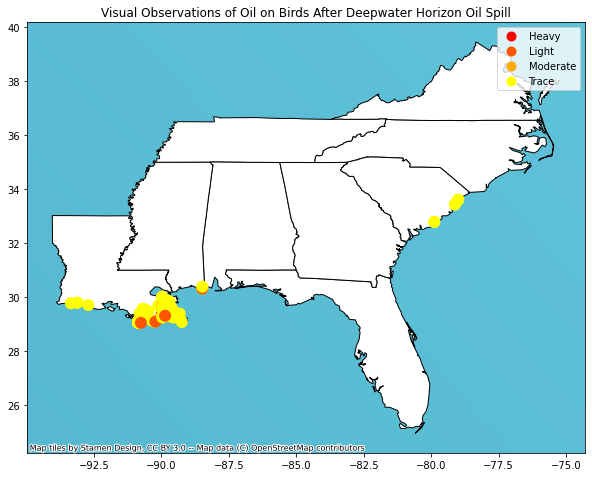

In [6]:
geodf = gpd.GeoDataFrame(birdOil,geometry=gpd.points_from_xy(birdOil.longitude,birdOil.latitude))

states = gpd.read_file('data/maps/States_shapefile.shp')
southeast = states[states['State_Code'].isin(['FL','GA','AL','SC','NC', 'TN', 'LA', 'MS', 'VA'])]
ax = southeast.plot(color = 'white',edgecolor='black',figsize=(10,10),legend=True)
geodf.plot(ax=ax,column='oiling',legend=True,figsize=(12,12),marker='o',linewidth=6,cmap='autumn')
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=12)

plt.title("Visual Observations of Oil on Birds After Deepwater Horizon Oil Spill")
plt.show()

With this map visualization, it can be seen that the oil from the Deepwater Horizon spill affected birds that weren't even in the direct vicinity of the original impact zone.  The data collected shows that birds as far away as Louisiana and South Carolina were observed with oil on their bodies and feathers.  This alludes to the reason why open water oil spills are so dangerous (especially ones that aren't cleaned up right away like the Deepwater Horizon incident); the currents in the ocean can cause the oil to disperse, impacting more wildlife.  

Let's now look at the various sites of capture that were investigated during this study - those that contained oil and those that didn't - to see if there is any trend or correlation between oil on the birds and oil at the location.

#### Cleaning Data on Capture Sites

In [13]:
siteEffects =  bird_health_df[['Site Oiling', 'Visual Oiling', 'Fluorescence Assessment']]
siteEffects.rename(columns={'Visual Oiling':'visual', 'Fluorescence Assessment': 'fluorescence','Site Oiling':'site'},inplace=True)
# Eliminating any rows where the oil at the site wasn't assessed
siteEffects = siteEffects[siteEffects['site'] != 'No recorded assessment of oiling at site.']

# Shortening words in columns
siteEffects['site'] = siteEffects['site'].apply(lambda x: x.split(' ')[0])
siteEffects['visual'] = siteEffects['visual'].apply(lambda x: x.split(' ')[0])
siteEffects['fluorescence'] = siteEffects['fluorescence'].apply(lambda x: x.split(' ')[0])

siteEffects.head()

,site,visual,fluorescence
0,No,Trace,No
1,No,Trace,No
2,No,Trace,No
4,No,Trace,No
5,No,Trace,No


In [14]:
# Numbering oiling and flurescence
# Calculating how many sites were not assesed for each observation to later subtract
noAssessmentVisual = (siteEffects['visual'] == 'Not').sum()
noAssessmentFluorescent = (siteEffects['fluorescence'] == 'Not').sum()
countVisual = siteEffects['visual'].count()
countFluorescent =siteEffects['fluorescence'].count()

# Dictionaries to change strings to numbers to accurately calculate percents
oilNums = {'No':0.0, 'Not':0.0, 'Trace':1.0, 'Light':1.0, 'Moderate':1.0,'Heavy':1.0}
siteCheck = {'Oiling':'Yes', 'No': 'No'}

# Turning strings into numbers (or for site column, yes or no)
siteEffects.visual = [oilNums[item] for item in siteEffects.visual]
siteEffects.fluorescence = [oilNums[item] for item in siteEffects.fluorescence]
siteEffects.site = [siteCheck[item] for item in siteEffects.site]

siteEffects.head()

,site,visual,fluorescence
0,No,1.0,0.0
1,No,1.0,0.0
2,No,1.0,0.0
4,No,1.0,0.0
5,No,1.0,0.0


#### Preparing columns with percents of birds observed with oil

In [20]:
siteEffects = siteEffects.groupby('site').agg({'visual':'sum','fluorescence':'sum'})
print("Total birds surveyed at sites visually: " + str(countVisual - noAssessmentVisual))
print("Total birds surveyed at sites fluorescentally: " + str(countFluorescent - noAssessmentFluorescent))
print("Chart of number of birds with oil at each site below:")
siteEffects.head()

Total birds surveyed at sites visually: 832
Total birds surveyed at sites fluorescentally: 843
Chart of number of birds with oil at each site below:


,visual,fluorescence
site,,
No,129.0,192.0
Yes,43.0,158.0


#### Plotting the Data

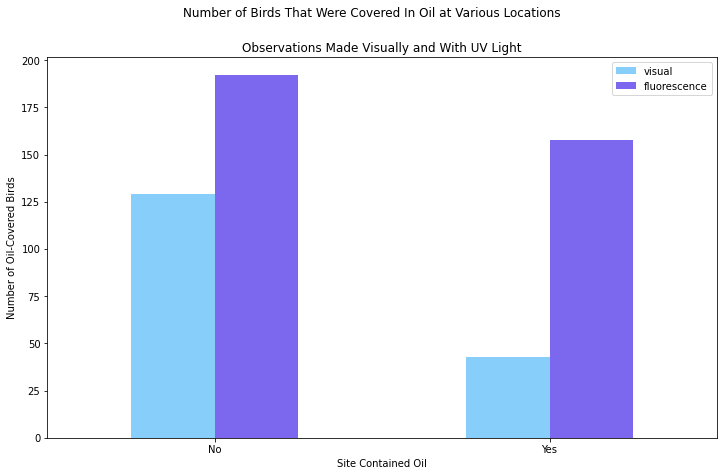

In [22]:
siteEffects.plot.bar(rot=0,color={'visual':'lightskyblue','fluorescence':'mediumslateblue'},figsize=(12,7))
plt.suptitle("Number of Birds That Were Covered In Oil at Various Locations")
plt.title("Observations Made Visually and With UV Light")
plt.xlabel("Site Contained Oil")
plt.ylabel("Number of Oil-Covered Birds")

plt.show()

From the barchart above, the data shows that even when birds may not visually look like they have oil on them, further examination using fluorescent lights can reveal an impact of oil on bird feathers.  Therefore, the effects of oily residue can't always be seen easily.  Even when the sites where the birds were captured didn't contain oil, oil was still found on the animals, alluding to the fact that oil from an oil spill can find its way to wildlife indirectly.  Birds travel and migrate, and they can pick up oil that stays with them even as they move farther away from the impact site.

Together, between the sites that contained oil or didn't, the total number of birds observed with oil under UV light comes to 350 birds, approximately 41.52% of the total number of birds surveyed that had oil assessment data at the site and under fluorescent light.  That is a large amount of birds impacted by oil spills, especially considering this study didn't even collect data from the Florida coast which was the closest to the spill origination.  Oil on birds a serious problem; oiled feathers can lead to loss of water repellency, insulation, and flight functions, which has serious implications for a bird's ability to fly and regulate their bodies.

### **Effects of Oil Spills on Local Fishing Economies**

### **Effects of Oil Spills on Sand Contents**

One major question about the lasting impacts of oil spills is, where does all the oil go?  One of the places oil ends up is in sand, especially in the coastal beaches around the oil spill origination.  I want to see if the oil stays in the sand over time, or if the situation clears up after a few years.

To start, I'll read in a dataset that contains information about the oil content in sand patties:

In [78]:
oil_sand_df = pd.read_excel('data/oil-sand.xlsx',sheet_name="data")
## need to drop last 4 rows due to non-data information attached by source
oil_sand_df.drop(oil_sand_df.tail(4).index,inplace = True) ## dropping last 4 rows
oil_sand_df.tail() 

,Sample Number,Collection Date,Sample ID,Sampling Location,Latitude,Longitude,Processing Lab,Fractional Oil Content,Fractional Moisture Content
560,561,6/24/2014,062414-41,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1040,ND
561,562,6/24/2014,062414-42,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1959,ND
562,563,6/24/2014,062414-43,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1589,ND
563,564,6/24/2014,062414-44,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1091,ND
564,565,6/24/2014,062414-45,"West Ship Island, MS",30.207897,-88.96099,Reddy,0.1368,ND


In [79]:
#change location to just state name and let's plot the oil content over time 
oil_areas_df = oil_sand_df
oil_areas_df['Sampling Location'] = oil_sand_df['Sampling Location'].apply(lambda x: x.split(',')[1].strip())
oil_areas_df.head(2)

,Sample Number,Collection Date,Sample ID,Sampling Location,Latitude,Longitude,Processing Lab,Fractional Oil Content,Fractional Moisture Content
0,1,4/3/2011,040311-11,AL,30.242830,-88.122680,Reddya,0.174400,ND
1,2,7/17/2011,071711-03,FL,30.308542,-87.371185,Aepplib,0.129956,0.003369


Now, I'll plot the data over time so we can see the oil content over time between the different locations. In terms of the data, I'll be changing fractional oil content to the percentage of oil in the sand for easier analysis interpretation.

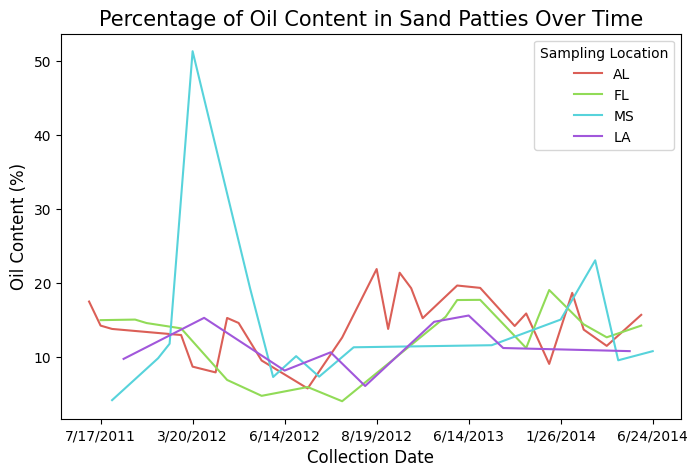

In [80]:
plt.subplots(figsize=(8,5))
oil_areas_df['Fractional Oil Content'] = oil_sand_df['Fractional Oil Content'].apply(lambda x: x * 100)
ax = sns.lineplot(data=oil_areas_df, x='Collection Date', y='Fractional Oil Content', hue='Sampling Location',estimator=np.median,ci=None,palette="hls") 
plt.title('Percentage of Oil Content in Sand Patties Over Time',fontsize=15)
plt.ylabel("Oil Content (%)",fontsize=12)
plt.xlabel("Collection Date",fontsize=12)
xticks = ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 8 == 1:
        xticks[i].set_visible(True)
    else:
        xticks[i].set_visible(False)
plt.show()

As seen in the lineplot above, despite the fact that the Deepwater Horizon incident took place in 2010, even years later, in 2014, the sand still had an oil content of around 10-20% in all locations.  Although there were some increases and decreases in the amount of oil in the sand over time, it never completely disappeared.  Even as the sand endured weathering, portions of oil still remained.  Knowing that oil residue is pervasive and persistent, it brings up concerns about wildlife and even human activity on the beaches affected by oil spills.  

### **Effects of Oil Spills on Fish**

## **Conclusions of Analysis:**

## **Ethical Concerns:**

## **Citations:**